In [2]:
import pandas as pd
import numpy as np
import time
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

In [36]:
labels=['AircraftBuoyant', 'Apartment', 'AquaticAnimal', 'Bed', 'Bicycle', 'Biplane', 'Bird', 'Bookset', 'Bottle', 'BuildingNonResidential', 'Bus', 'Car', 'Cellphone', 'Chess', 'City', 'ClassicPiano', 'Computer', 'ComputerKeyboard', 'Cup', 'DeskLamp', 'DeskPhone', 'Door', 'Drum', 'Fish', 'FloorLamp', 'Glasses', 'Guitar', 'Gun', 'Hand', 'Hat', 'Helicopter', 'House', 'HumanHead', 'Humanoid', 'Insect', 'Jet', 'Knife', 'MilitaryVehicle', 'Monitor', 'Monoplane', 'Motorcycle', 'Mug', 'MultiSeat', 'Musical_Instrument', 'NonWheelChair', 'PianoBoard', 'PlantIndoors', 'PlantWildNonTree', 'Quadruped', 'RectangleTable', 'Rocket', 'RoundTable', 'Shelf', 'Ship', 'Sign', 'Skyscraper', 'Spoon', 'Starship', 'SubmachineGun', 'Sword', 'Tool', 'Train', 'Tree', 'Truck', 'TruckNonContainer', 'Vase', 'Violin', 'Wheel', 'WheelChair']

def unpack_feature_db_2(feature_db):

    class_list = feature_db['class'].tolist()
    #print(class_list)
    feature_list = []
    for index, row in feature_db.iterrows():
        feature_vect = []
        feature_list.append(row[2:9].tolist())
    #print(feature_list.shape, class_list.shape)
    return feature_list


feature_db = pd.read_pickle("featuresPML2_standardized.pkl")
#print(feature_db)
features = unpack_feature_db_2(feature_db)
feature_db

,class,path,S,D,Vobb,E,Vch,A3,D1,D2,D3,D4,SIL1,SIL2,SIL3,R31,R21
1,AircraftBuoyant,./featuresPML2/AircraftBuoyant\m1337,0.489777,-0.224801,2.200740,2.468209,2.448414,"[0.001046, 0.002845, 0.004164, 0.00577, 0.0069...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9e-05, 0.00045, 0.00081, 0.00115, 0.00135, 0....","[1e-06, 1.2e-05, 3.8e-05, 9.5e-05, 0.000178, 0...","[1.1e-05, 6.2e-05, 0.000135, 0.000291, 0.00051...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.804483,1.101076
1,AircraftBuoyant,./featuresPML2/AircraftBuoyant\m1338,0.905209,-0.128491,2.560081,2.108936,2.729319,"[0.001324, 0.003056, 0.004626, 0.005878, 0.007...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0001, 0.00061, 0.00082, 0.00119, 0.00135, 0...","[2.000002000002e-06, 2.2000022000022e-05, 7.50...","[8.000008000008e-06, 6.1000061000061e-05, 0.00...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.804483,1.132252
1,AircraftBuoyant,./featuresPML2/AircraftBuoyant\m1339,0.019009,-0.686687,0.452778,0.059811,0.434004,"[0.0076680460082760495, 0.014814088884533307, ...","[0.0, 0.0018883193957377933, 0.007553277582951...","[0.00323, 0.00693, 0.00981, 0.00844, 0.00992, ...","[0.000226, 0.001351, 0.00259, 0.003837, 0.0052...","[0.000261, 0.001498, 0.003104, 0.005356, 0.007...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.744534,0.625220
1,AircraftBuoyant,./featuresPML2/AircraftBuoyant\m1340,-0.698511,-0.686780,-0.542518,-0.521517,-0.623545,"[0.014483, 0.021554, 0.032356, 0.031969, 0.035...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.005550055500555005, 0.015360153601536015, 0...","[0.000197, 0.001202, 0.002827, 0.004635, 0.006...","[0.000209, 0.001073, 0.002684, 0.004784, 0.007...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0546875,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0546875,...",0.796093,0.469082
1,AircraftBuoyant,./featuresPML2/AircraftBuoyant\m1341,-0.618468,-0.686890,-0.504500,-0.550291,-0.560483,"[0.013054, 0.029588, 0.037518, 0.041261, 0.042...","[0.0, 0.0, 0.003657142857142857, 0.01097142857...","[0.0017600176001760018, 0.004450044500445004, ...","[2.5e-05, 0.000217, 0.00064, 0.001338, 0.00225...","[5.4000054000054e-05, 0.000379000379000379, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.807254,0.297727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,WheelChair,./featuresPML2/WheelChair\D00687,0.076080,-0.338939,-0.099686,0.231948,-0.080899,"[0.010374, 0.014603, 0.014464, 0.013193, 0.013...","[0.0, 3.0847060275155775e-05, 3.08470602751557...","[0.00286, 0.00484, 0.00583, 0.00656, 0.00733, ...","[7.2e-05, 0.000383, 0.000914, 0.00156, 0.00223...","[5.2e-05, 0.000371, 0.000977, 0.001782, 0.0027...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",-0.626915,0.186023
1,WheelChair,./featuresPML2/WheelChair\D00720,-0.141366,-0.450048,0.009303,0.689685,0.015408,"[0.007873, 0.012641, 0.012021, 0.0103, 0.00994...","[4.096873500251665e-05, 9.949549929182615e-05,...","[0.00192, 0.00556, 0.00825, 0.00912, 0.00744, ...","[4.5e-05, 0.000308, 0.000707, 0.001233, 0.0017...","[3.9e-05, 0.000318, 0.000785, 0.001432, 0.0022...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",-0.500055,0.257979
1,WheelChair,./featuresPML2/WheelChair\D00782,-0.272489,-0.034254,0.613814,1.217417,0.316977,"[0.02134802134802135, 0.02394

In [37]:
db = feature_db.to_numpy()
new_db = []
for i in db:
    new = i[0:7]
    for j in i[7:15]:
        new = np.append(new, j)
    new = np.append(new,i[15:17])
    new_db.append(new)
    

test_db = pd.DataFrame(new_db)
test_db[0]
test_db
    

,0,1,2,3,4,5,6,7,8,9,...,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033
0,AircraftBuoyant,./featuresPML2/AircraftBuoyant\m1337,0.489777,-0.224801,2.200740,2.468209,2.448414,0.001046,0.002845,0.004164,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.804483,1.101076
1,AircraftBuoyant,./featuresPML2/AircraftBuoyant\m1338,0.905209,-0.128491,2.560081,2.108936,2.729319,0.001324,0.003056,0.004626,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.804483,1.132252
2,AircraftBuoyant,./featuresPML2/AircraftBuoyant\m1339,0.019009,-0.686687,0.452778,0.059811,0.434004,0.007668,0.014814,0.017844,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.744534,0.625220
3,AircraftBuoyant,./featuresPML2/AircraftBuoyant\m1340,-0.698511,-0.686780,-0.542518,-0.521517,-0.623545,0.014483,0.021554,0.032356,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.796093,0.469082
4,AircraftBuoyant,./featuresPML2/AircraftBuoyant\m1341,-0.618468,-0.686890,-0.504500,-0.550291,-0.560483,0.013054,0.029588,0.037518,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.807254,0.297727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2462,WheelChair,./featuresPML2/WheelChair\D00687,0.076080,-0.338939,-0.099686,0.231948,-0.080899,0.010374,0.014603,0.014464,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.626915,0.186023
2463,WheelChair,./featuresPML2/WheelChair\D00720,-0.141366,-0.450048,0.009303,0.689685,0.015408,0.007873,0.012641,0.012021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.500055,0.257979
2464,WheelChair,./featuresPML2/WheelChair\D00782,-0.272489,-0.034254,0.613814,1.217417,0.316977,0.021348,0.023945,0.013893,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.729162,0.478185
2465,WheelChair,./featuresPML2/WheelChair\D00821,0.076099,-0.338841,-0.094232,0.232188,-0.080869,0.010387,0.014510,0.014444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.623608,0.184619


In [29]:
#print(feature_db[2:9])
#df2 = feature_db.iloc[:,[0,2,3,4,5,6,7,8]] # Select columns by Index
#df2_tsne = feature_db.iloc[:,[2,3,4,5,6,7,8]] # Select columns by Index
#print(df2_tsne)

in_put_all = test_db.iloc[:,[0]+list(range(2,1034))]
in_put_all_tsne = test_db.iloc[:,list(range(2,1034))]
in_put_all

,0,2,3,4,5,6,7,8,9,10,...,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033
0,AircraftBuoyant,0.489777,-0.224801,2.200740,2.468209,2.448414,0.001046,0.002845,0.004164,0.005770,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.804483,1.101076
1,AircraftBuoyant,0.905209,-0.128491,2.560081,2.108936,2.729319,0.001324,0.003056,0.004626,0.005878,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.804483,1.132252
2,AircraftBuoyant,0.019009,-0.686687,0.452778,0.059811,0.434004,0.007668,0.014814,0.017844,0.021108,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.744534,0.625220
3,AircraftBuoyant,-0.698511,-0.686780,-0.542518,-0.521517,-0.623545,0.014483,0.021554,0.032356,0.031969,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.796093,0.469082
4,AircraftBuoyant,-0.618468,-0.686890,-0.504500,-0.550291,-0.560483,0.013054,0.029588,0.037518,0.041261,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.807254,0.297727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2462,WheelChair,0.076080,-0.338939,-0.099686,0.231948,-0.080899,0.010374,0.014603,0.014464,0.013193,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.626915,0.186023
2463,WheelChair,-0.141366,-0.450048,0.009303,0.689685,0.015408,0.007873,0.012641,0.012021,0.010300,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.500055,0.257979
2464,WheelChair,-0.272489,-0.034254,0.613814,1.217417,0.316977,0.021348,0.023945,0.013893,0.009166,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.729162,0.478185
2465,WheelChair,0.076099,-0.338841,-0.094232,0.232188,-0.080869,0.010387,0.014510,0.014444,0.013359,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.623608,0.184619


In [30]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=3000)
tsne_results = tsne.fit_transform(in_put_all_tsne)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2467 samples in 0.025s...
[t-SNE] Computed neighbors for 2467 samples in 2.252s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2467
[t-SNE] Computed conditional probabilities for sample 2000 / 2467
[t-SNE] Computed conditional probabilities for sample 2467 / 2467
[t-SNE] Mean sigma: 0.626043
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.592842
[t-SNE] KL divergence after 3000 iterations: 1.056138
t-SNE done! Time elapsed: 81.26703453063965 seconds


<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

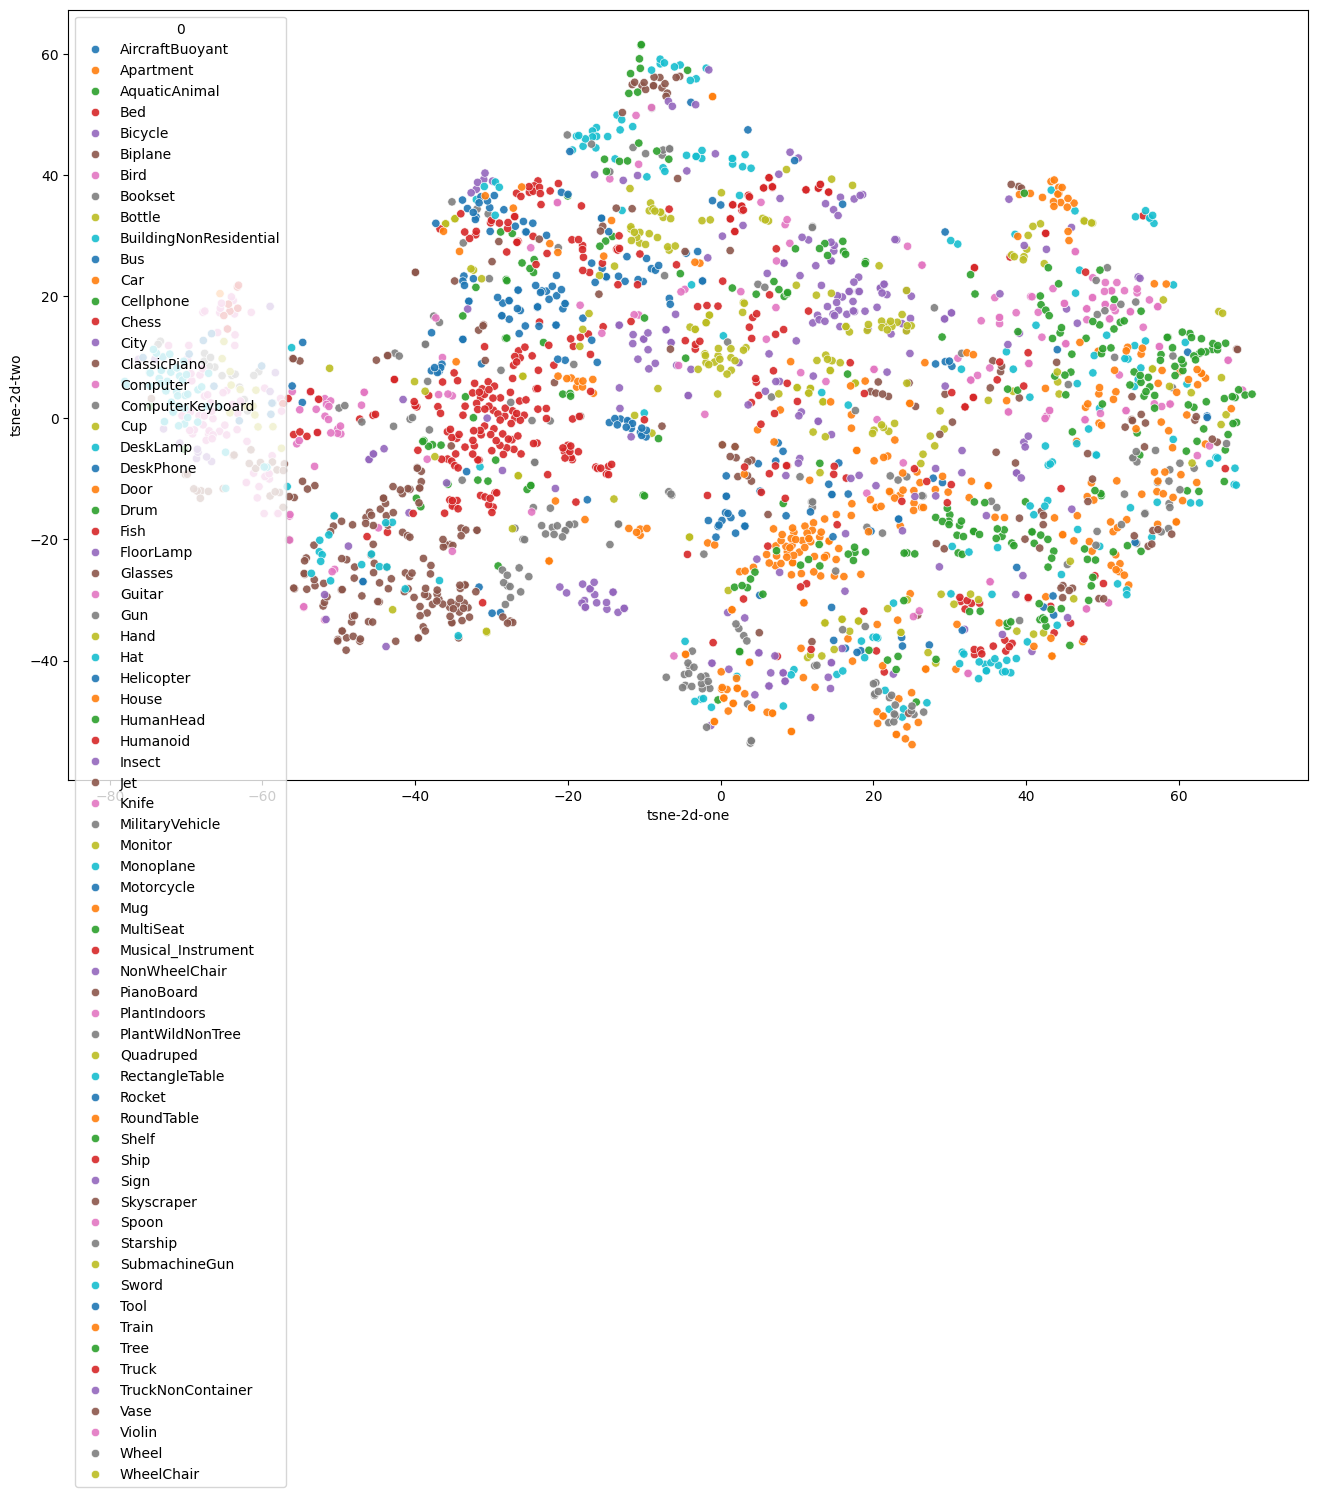

In [33]:
in_put_all['tsne-2d-one'] = tsne_results[:,0]
in_put_all['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=0,
    palette="tab10",
    data=in_put_all,
    legend="full",
    alpha=0.9
)

***Try TSNE on smaller subset***

In [58]:
#try tsne on subset of data
#subset_classes = ['Chess', 'City', 'ClassicPiano', 'Computer', 'ComputerKeyboard', 'Cup', 'DeskLamp', 'DeskPhone', 'Door', 'Drum']
subset_classes = np.random.choice(labels,10)

small_df = test_db.loc[test_db[0].isin(subset_classes)]
#in_put = small_df.iloc[:,[0,2,3,4,5,6,7,8]] # Select columns by Index
#in_put_tsne = small_df.iloc[:,[2,3,4,5,6,7,8]] # Select columns by Index

#in_put = small_df.iloc[:,[0,3,5,7]+list(range(9,509))]
#in_put_tsne = small_df.iloc[:,[3,5,7]+list(range(9,509))]

in_put = small_df.iloc[:,[0]+list(range(2,1034))]
in_put_tsne = small_df.iloc[:,list(range(2,1034))]
in_put

,0,2,3,4,5,6,7,8,9,10,...,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033
95,Bicycle,-0.690757,-0.589976,-0.515308,-0.689588,-0.502459,0.020749,0.026448,0.028331,0.027486,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.006874,-0.477160
96,Bicycle,-0.708777,-0.676527,-0.360342,-0.689032,-0.552736,0.020398,0.025882,0.028829,0.025481,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.798305,-0.397468
97,Bicycle,-0.605058,-0.371232,-0.211182,-0.637925,-0.477131,0.046711,0.038337,0.031724,0.028927,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.820036,-0.456714
98,Bicycle,-0.597764,-0.521307,-0.144422,-0.622774,-0.366236,0.016713,0.027993,0.028471,0.026140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.993806,-0.571042
99,Bicycle,-0.501216,0.172183,0.057737,-0.510871,-0.182612,0.010591,0.015596,0.017786,0.019889,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.865414,-0.403142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2385,TruckNonContainer,0.472264,-0.315467,-0.237262,-0.467517,-0.256856,0.007600,0.018015,0.023955,0.026023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009581,-0.141487
2386,TruckNonContainer,0.793800,-0.016657,-0.044024,0.013188,0.277453,0.004116,0.009897,0.013646,0.016327,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.014103,-0.096964
2387,TruckNonContainer,0.176053,-0.260882,-0.471403,-0.529584,-0.260073,0.008317,0.019362,0.024754,0.024579,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.620297,-0.280373
2388,TruckNonContainer,0.901772,0.641606,0.116731,-0.197320,0.456690,0.013021,0.018485,0.021480,0.023955,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.256692,0.154870


[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 242 samples in 0.004s...
[t-SNE] Computed neighbors for 242 samples in 0.032s...
[t-SNE] Computed conditional probabilities for sample 242 / 242
[t-SNE] Mean sigma: 0.560332
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.462059
[t-SNE] KL divergence after 5350 iterations: 0.462058
t-SNE done! Time elapsed: 7.03809380531311 seconds


<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

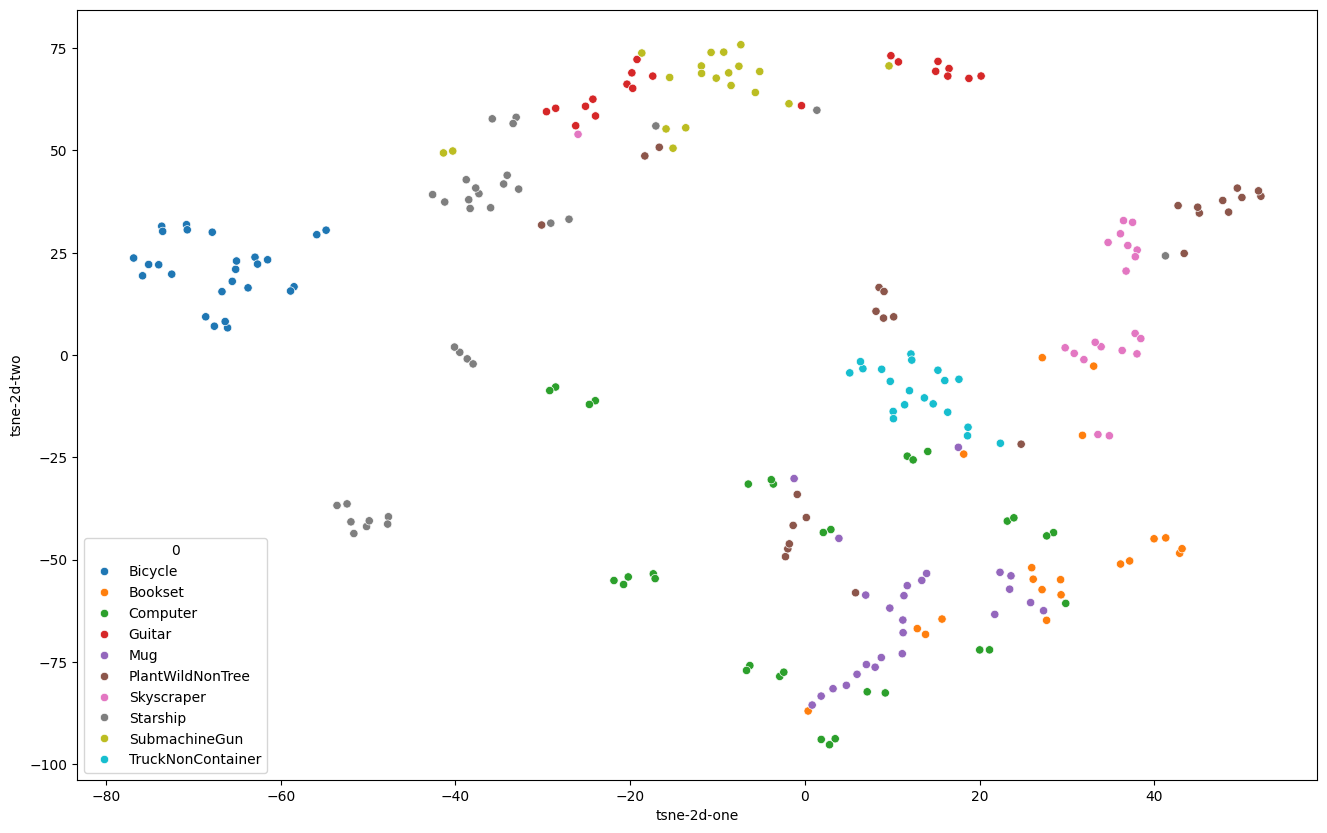

In [59]:
time_start = time.time()
#perp = 5
tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=10000)
tsne_results = tsne.fit_transform(in_put_tsne)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


in_put['tsne-2d-one'] = tsne_results[:,0]
in_put['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
#sns.color_palette("tab10")
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=0,
    palette="tab10",
    data=in_put,
    legend="full",
    alpha=1
)